In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [60]:
# Import the library to mount Google Drive
from google.colab import drive

# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
# Define the file path
file_path = '/content/drive/My Drive/Mall_Customers.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [64]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


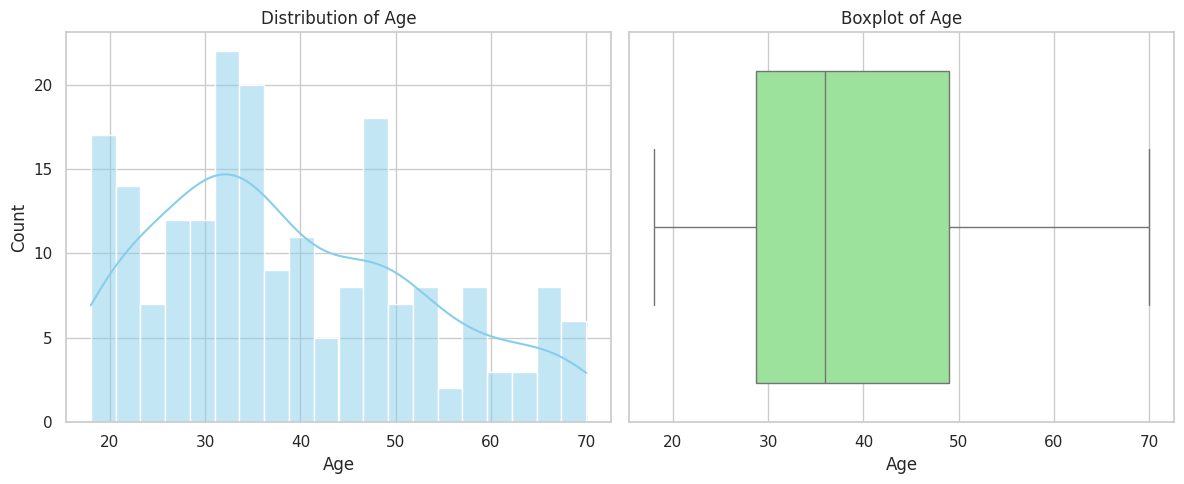

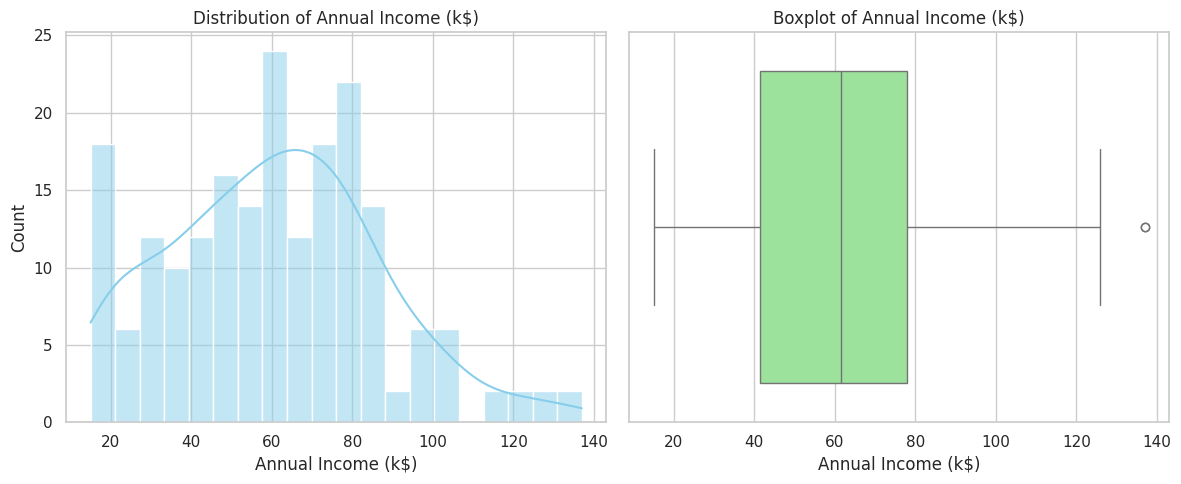

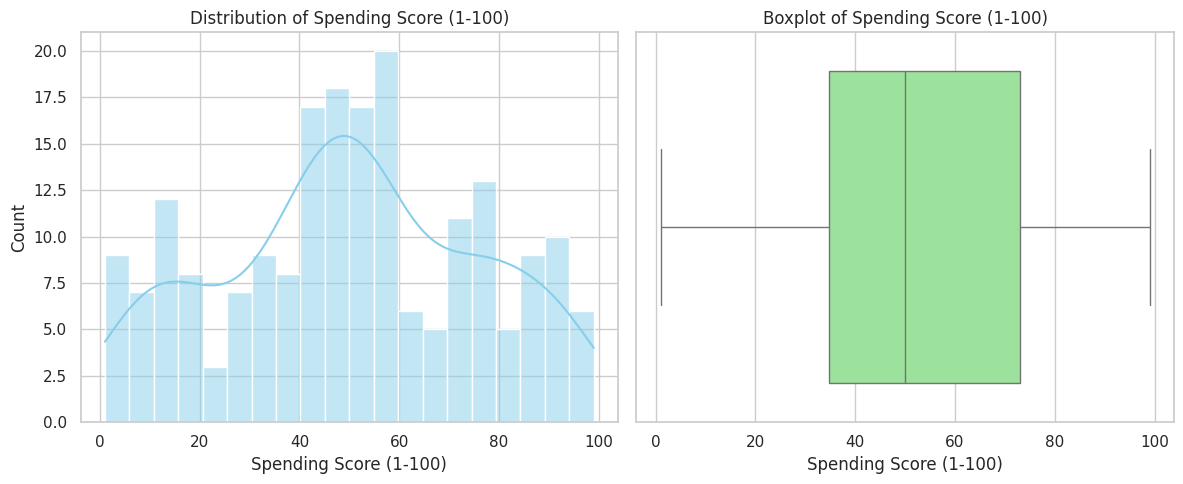

In [65]:
# Set plot style
sns.set(style="whitegrid")

# Univariate Analysis
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-66-151295850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


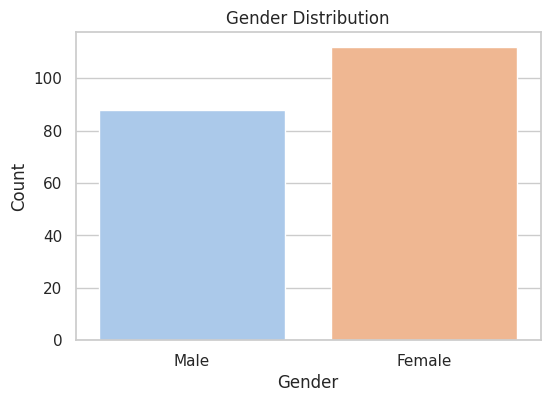

In [66]:
# Categorical Variable: Gender Countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

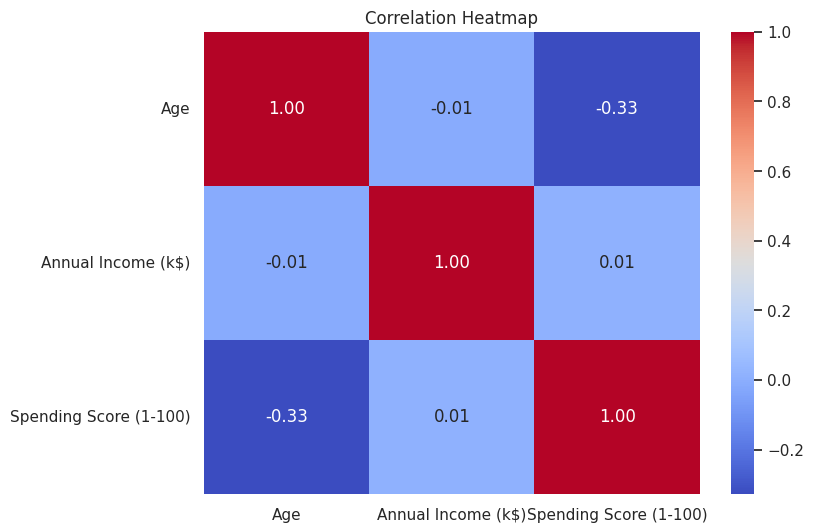

In [67]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [68]:
df2=df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [69]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df2=scaler.fit_transform(df2)

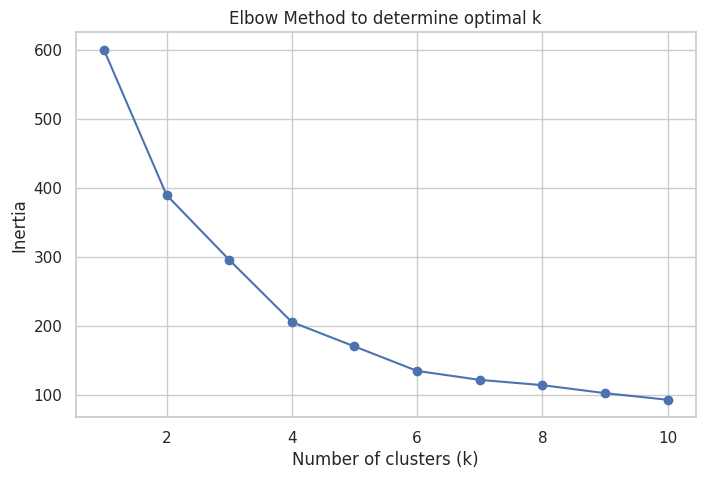

In [70]:
from sklearn.cluster import KMeans

inertia=[]
K=range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df2)
  inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to determine optimal k')
plt.grid(True)
plt.show()

In [71]:
from sklearn.cluster import KMeans

# Apply KMeans with optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df2)  # use your scaled features

In [72]:
# Convert scaled NumPy array back to DataFrame
#df2 = pd.DataFrame(df2, columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])

# Now .head() will work
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


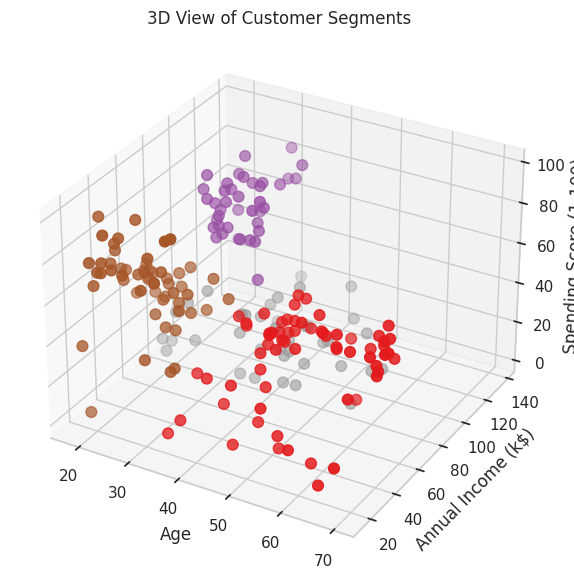

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["Age"],
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"],
    cmap='Set1',
    s=60
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.title("3D View of Customer Segments")
plt.show()


In [74]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean().round(1)


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,54.0,47.7,40.0
1,32.9,86.1,81.5
2,25.4,40.0,60.3
3,39.4,86.5,19.6


In [75]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df2, df['Cluster'])  # df2 = scaled features
print("Silhouette Score:", sil_score)


Silhouette Score: 0.4039582785148566


| Cluster | Age  | Annual Income (k\$) | Spending Score | Interpretation                                                                                                               |
| ------- | ---- | ------------------- | -------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **0**   | 54.0 | 47.7                | 40.0           | **Older customers with average income and moderate spending**. Possibly cautious spenders or value-seeking mature customers. |
| **1**   | 32.9 | 86.1                | 81.5           | **Young, high-income, high-spending**. Likely premium or luxury segment — good target for high-end marketing.                |
| **2**   | 25.4 | 40.0                | 60.3           | **Very young, low-income, decent spenders**. Possibly students or early professionals — value-driven.                        |
| **3**   | 39.4 | 86.5                | 19.6           | **Middle-aged, high-income, low spenders**. Likely cautious or busy professionals — may need nudging via promotions.         |
